#Library yang digunakan


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from imblearn.under_sampling import RandomUnderSampler

#Load data

In [50]:
df = pd.read_csv ('/content/diabetes.csv')
data = df

#Mengecek data

In [51]:
data.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
95,6.0,NaN,72.0,27.0,228.0,33.9,0.255,40.0,0
96,2.0,92.0,NaN,28.0,0.0,NaN,0.130,24.0,0
97,1.0,71.0,NaN,18.0,76.0,20.4,0.323,22.0,0
98,6.0,93.0,50.0,30.0,NaN,28.7,0.356,NaN,0


In [52]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,691.000000,653.000000,614.000000,730.000000,576.000000,538.000000,691.000000,614.000000,768.000000
mean,3.803184,120.462481,68.959283,20.520548,76.878472,31.993680,0.465363,33.166124,0.348958
std,3.333891,31.941336,19.768892,15.845282,107.629279,7.945932,0.317771,11.825889,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.238500,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,36.000000,32.150000,0.365000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,120.500000,36.300000,0.626500,40.000000,1.000000
max,17.000000,199.000000,114.000000,99.000000,680.000000,67.100000,2.329000,81.000000,1.000000


#Melihat missing values

In [53]:
data.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


#Mengganti missing values dengan nilai mean

In [54]:
data['BMI'].fillna(data['BMI'].mean(), inplace=True)
data['DiabetesPedigreeFunction'].fillna(data['DiabetesPedigreeFunction'].mean(), inplace=True)

<ipython-input-54-421a5beb3509>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BMI'].fillna(data['BMI'].mean(), inplace=True)
<ipython-input-54-421a5beb3509>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [55]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,31.99368,0.627000,NaN,1
1,1.0,85.0,66.0,29.0,0.0,31.99368,0.351000,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.30000,0.672000,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.10000,0.167000,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.10000,0.465363,33.0,1


#Mengganti missing values dengan nilai median

In [56]:
data['Pregnancies'].fillna(data['Pregnancies'].median(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)

<ipython-input-56-e31cad69648f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Pregnancies'].fillna(data['Pregnancies'].median(), inplace=True)
<ipython-input-56-e31cad69648f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [57]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,31.99368,0.627000,NaN,1
1,1.0,85.0,66.0,29.0,0.0,31.99368,0.351000,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.30000,0.672000,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.10000,0.167000,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.10000,0.465363,33.0,1


#Melihat nilai modus dan mengganti missing values dengan nilai modus

In [58]:

modus_data = data.mode().iloc[0]
print("Modus untuk seluruh kolom:\n", modus_data)

Modus untuk seluruh kolom:
 Pregnancies                   3.000000
Glucose                     100.000000
BloodPressure                70.000000
SkinThickness                 0.000000
Insulin                       0.000000
BMI                          31.993680
DiabetesPedigreeFunction      0.465363
Age                          22.000000
Outcome                       0.000000
Name: 0, dtype: float64


In [59]:
data['Age'].fillna(data['Age'].mode()[0], inplace=True)
data['Glucose'].fillna(data['Glucose'].mode()[0], inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mode()[0], inplace=True)

<ipython-input-59-7c237d2fb7d3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mode()[0], inplace=True)
<ipython-input-59-7c237d2fb7d3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [60]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [61]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,100.0,72.0,35.0,0.0,31.99368,0.627000,22.0,1
1,1.0,85.0,66.0,29.0,0.0,31.99368,0.351000,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.30000,0.672000,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.10000,0.167000,21.0,0
4,0.0,100.0,40.0,35.0,168.0,43.10000,0.465363,33.0,1
5,5.0,116.0,74.0,0.0,36.0,25.60000,0.201000,30.0,0
6,3.0,78.0,50.0,32.0,88.0,31.99368,0.248000,26.0,1
7,10.0,115.0,70.0,0.0,0.0,35.30000,0.465363,29.0,0
8,3.0,197.0,70.0,45.0,543.0,30.50000,0.158000,53.0,1
9,8.0,125.0,96.0,0.0,0.0,0.00000,0.232000,54.0,1


# Cek korelasi antar variabel dengan heatmap

<Axes: >

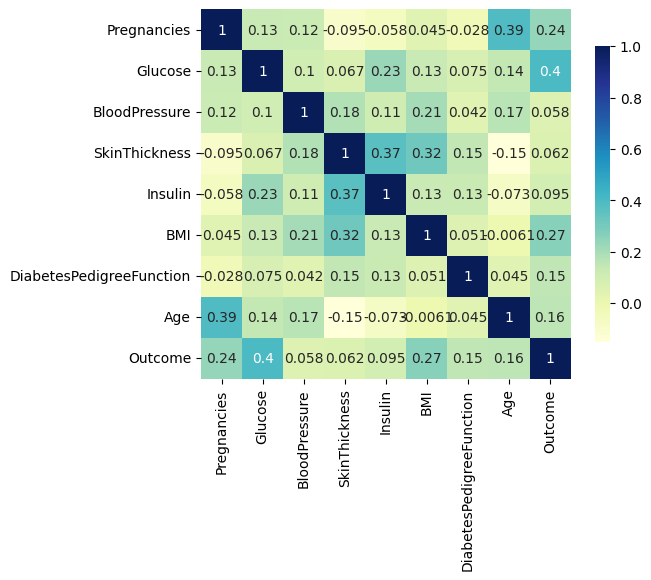

In [62]:
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', square=True, cbar_kws={"shrink": .8})

Dari heatmap di atas, dapat dilihat bahwa korelasi tertinggi adalah antara kolom Pregnancies dan kolom Age, begitupun sebaliknya dengan nilai 0.42.

#Lakukan imbalance handling dengan undersampling

Melihat plot data sebelum undersampling

<Axes: xlabel='count', ylabel='Outcome'>

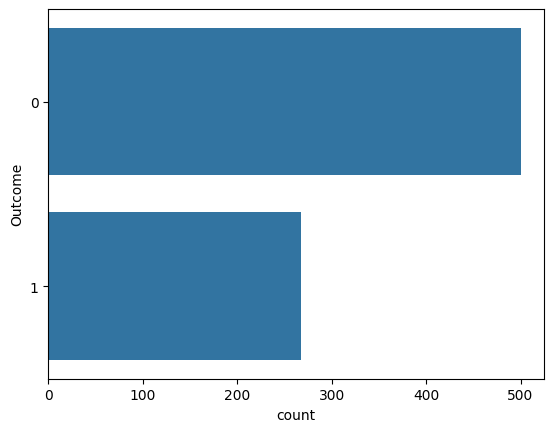

In [63]:
sns.countplot(data=df, y=y)

In [64]:

# Pisahkan fitur dan target
X = data.drop('Outcome', axis=1)  # Fitur (selain kolom 'Outcome')
y = data['Outcome']               # Target (kolom 'Outcome')

# Inisialisasi RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Terapkan undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Gabungkan kembali fitur dan target menjadi DataFrame
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                            pd.Series(y_resampled, name='Outcome')], axis=1)

Melihat plot data setelah undersampling

<Axes: xlabel='count', ylabel='Outcome'>

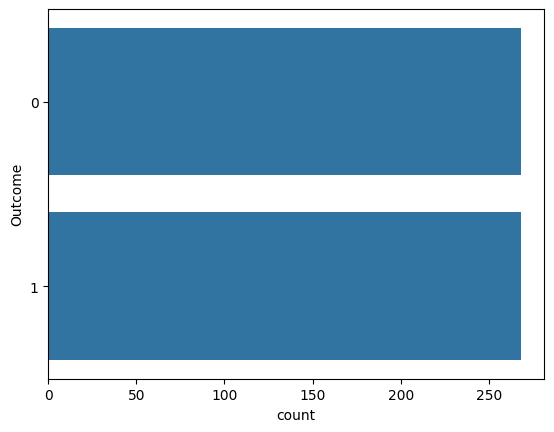

In [65]:
sns.countplot(data=X_resampled, y=y_resampled)

# Lakukan scaling dengan robust scaler dan minmax


In [66]:

# Pisahkan fitur dan target
X = data.drop('Outcome', axis=1)  # Fitur (selain kolom 'Outcome')
y = data['Outcome']               # Target (kolom 'Outcome')

# Inisialisasi scaler
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# Terapkan Robust Scaler
X_robust_scaled = robust_scaler.fit_transform(X)

# Terapkan MinMax Scaler
X_minmax_scaled = minmax_scaler.fit_transform(X)

# Konversi hasil scaling ke DataFrame
X_robust_df = pd.DataFrame(X_robust_scaled, columns=X.columns)
X_minmax_df = pd.DataFrame(X_minmax_scaled, columns=X.columns)

# Tambahkan kembali kolom target ke DataFrame hasil scaling
data_robust_scaled = pd.concat([X_robust_df, y.reset_index(drop=True)], axis=1)
data_minmax_scaled = pd.concat([X_minmax_df, y.reset_index(drop=True)], axis=1)


print("Proses scaling selesai. Hasil disimpan sebagai 'diabetes_robust_scaled.csv' dan 'diabetes_minmax_scaled.csv'.")


Proses scaling selesai. Hasil disimpan sebagai 'diabetes_robust_scaled.csv' dan 'diabetes_minmax_scaled.csv'.
